In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz 
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
jaimepath='/content/drive/MyDrive/diabetic_data.csv'
upapath='mete tu path'
miguelpath='mete tu path'

#cambiar el path en función del usuario que acceda para poner su ruta en drive

df = pd.read_csv (jaimepath, header = None, names=['encounter_id','patient_nbr','race','gender','age','weight','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','payer_code','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted'])
df.columns = ['encounter_id','patient_nbr','race','gender','age','weight','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','payer_code','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted']
print(df.shape)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,6,7,8,9,12,13,14,15,16,17,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(101767, 50)


encounter_id  patient_nbr             race  ...  change  diabetesMed  readmitted
0  encounter_id  patient_nbr             race  ...  change  diabetesMed  readmitted
1       2278392      8222157        Caucasian  ...      No           No          NO
2        149190     55629189        Caucasian  ...      Ch          Yes         >30
3         64410     86047875  AfricanAmerican  ...      No          Yes          NO
4        500364     82442376        Caucasian  ...      Ch          Yes          NO

[5 rows x 50 columns]

Discard the features with more than 50% missing values

In [ ]:
df = df.drop(columns = ['weight','payer_code','medical_specialty'])

Getting rid of unnecessary features of patient identification

In [ ]:
df = df.drop(columns = ['encounter_id','patient_nbr'])

In [ ]:
print(df.shape)
df.head()

(101767, 45)


race  gender      age  ...  change  diabetesMed  readmitted
0             race  gender      age  ...  change  diabetesMed  readmitted
1        Caucasian  Female   [0-10)  ...      No           No          NO
2        Caucasian  Female  [10-20)  ...      Ch          Yes         >30
3  AfricanAmerican  Female  [20-30)  ...      No          Yes          NO
4        Caucasian    Male  [30-40)  ...      Ch          Yes          NO

[5 rows x 45 columns]

Turn categorical to numerical

In [ ]:
df=df.replace(to_replace ='[0-10)'	, value = 0)
df=df.replace(to_replace ='[10-20)'	, value = 1)
df=df.replace(to_replace ='[20-30)'	, value = 2)
df=df.replace(to_replace ='[30-40)'	, value = 3)
df=df.replace(to_replace ='[40-50)'	, value = 4)
df=df.replace(to_replace ='[50-60)'	, value = 5)
df=df.replace(to_replace ='[60-70)'	, value = 6)
df=df.replace(to_replace ='[70-80)'	, value = 7)
df=df.replace(to_replace ='[80-90)'	, value = 8)
df=df.replace(to_replace ='[90-100)'	, value = 9)

df=df.replace(to_replace ='Male'	, value = 0)
df=df.replace(to_replace ='Female'	, value = 1)

df=df.replace(to_replace ='Caucasian'	, value = 0)
df=df.replace(to_replace ='AfricanAmerican'	, value = 1)
df=df.replace(to_replace ='Asian'	, value = 2)
df=df.replace(to_replace ='Hispanic'	, value = 3)
df=df.replace(to_replace ='Other'	, value = 4)



In [ ]:
print(df.shape)
df.head(20)

(101767, 45)


race  gender  age  ...  change  diabetesMed  readmitted
0   race  gender  age  ...  change  diabetesMed  readmitted
1      0       1    0  ...      No           No          NO
2      0       1    1  ...      Ch          Yes         >30
3      1       1    2  ...      No          Yes          NO
4      0       0    3  ...      Ch          Yes          NO
5      0       0    4  ...      Ch          Yes          NO
6      0       0    5  ...      No          Yes         >30
7      0       0    6  ...      Ch          Yes          NO
8      0       0    7  ...      No          Yes         >30
9      0       1    8  ...      Ch          Yes          NO
10     0       1    9  ...      Ch          Yes          NO
11     1       1    4  ...      No          Yes         >30
12     1       0    6  ...      Ch          Yes         <30
13     0       1    4  ...      Ch          Yes         <30
14     0       0    8  ...      No          Yes          NO
15     1       1    6  ...      No          Yes         >30
16     1       0    6  ...      Ch          Yes          NO
17     1       0    5  ...      Ch          Yes         <30
18     0       1    5  ...      No          Yes          NO
19     1       0    7  ...      No          Yes         >30

[20 rows x 45 columns]

In [ ]:
df=df.replace(to_replace ='None'	, value = 0)
df=df.replace(to_replace ='Normal'	, value = 1)
df=df.replace(to_replace ='>200'	, value = 2)
df=df.replace(to_replace ='>300'	, value = 3)

df=df.replace(to_replace ='None'	, value = 0)
df=df.replace(to_replace ='Normal'	, value = 1)
df=df.replace(to_replace ='>7'	, value = 2)
df=df.replace(to_replace ='>8'	, value = 3)

df=df.replace(to_replace ='No'	, value = 0)
df=df.replace(to_replace ='Up'	, value = 1)
df=df.replace(to_replace ='Down'	, value = 2)
df=df.replace(to_replace ='Steady'	, value = 3)

df=df.replace(to_replace ='No'	, value = 0)
df=df.replace(to_replace ='Ch'	, value = 1)

df=df.replace(to_replace ='No'	, value = 0)
df=df.replace(to_replace ='Yes'	, value = 1)

df=df.replace(to_replace ='NO'	, value = 0)
df=df.replace(to_replace ='<30'	, value = 1)
df=df.replace(to_replace ='>30'	, value = 2)

In [ ]:
print(df.shape)
df.head()

(101767, 45)


race  gender  age  ...  change  diabetesMed  readmitted
0  race  gender  age  ...  change  diabetesMed  readmitted
1     0       1    0  ...       0            0           0
2     0       1    1  ...       1            1           2
3     1       1    2  ...       0            1           0
4     0       0    3  ...       1            1           0

[5 rows x 45 columns]

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce', axis=1)


Initial data visualization

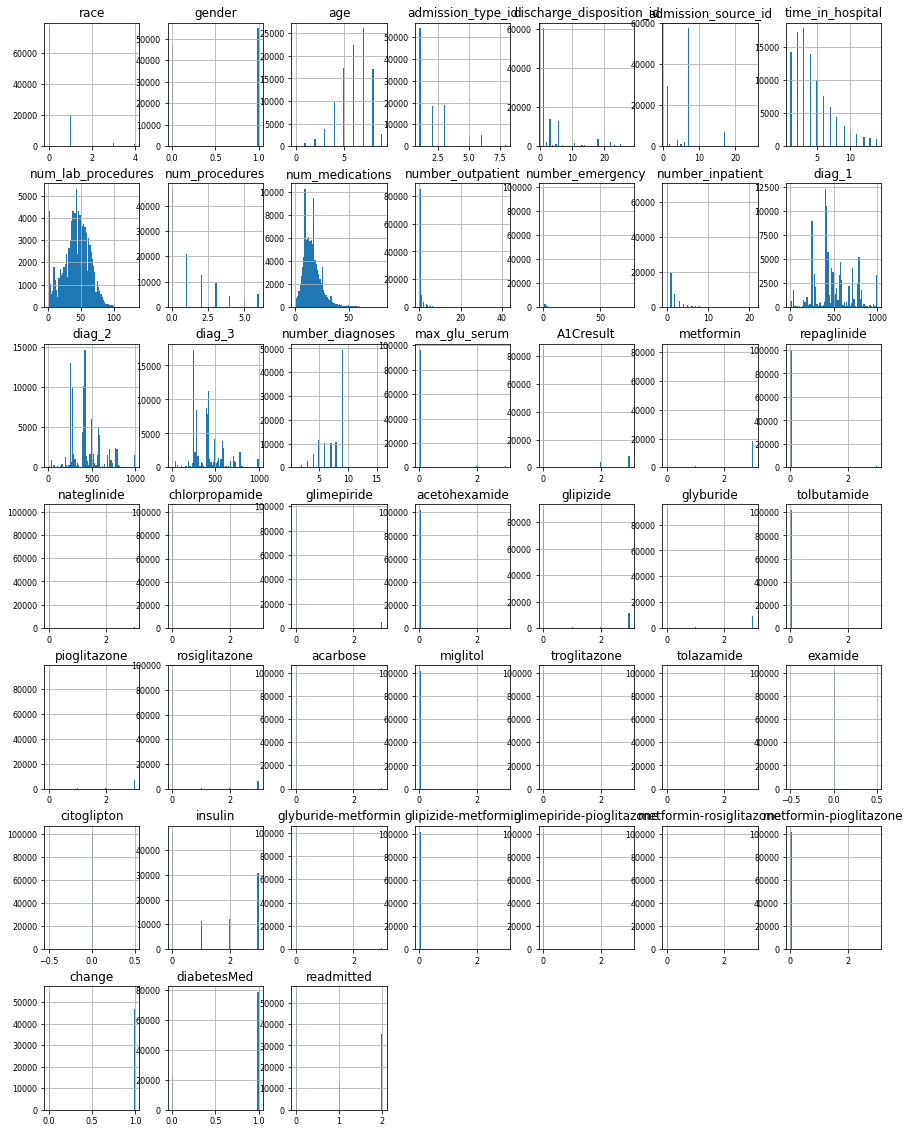

In [ ]:
df.hist(figsize=(15, 20), bins=70, xlabelsize=8, ylabelsize=8); 

In [ ]:
print(df["diag_1"].mode())
print(df["diag_2"].mode())
print(df["num_lab_procedures"].mode())


0    250
dtype: int64
0    250
dtype: int64
0    1
dtype: int64


In [ ]:
# get top 10 most frequent names
n = 10
df['diag_1'].value_counts()[:n].index.tolist()

[250, 428, 414, 786, 410, 486, 427, 493, 491, 715]

In [ ]:
# get top 10 most frequent names
n = 10
df['diag_2'].value_counts()[:n].index.tolist()

[250, 276, 428, 427, 401, 496, 599, 438, 403, 414]

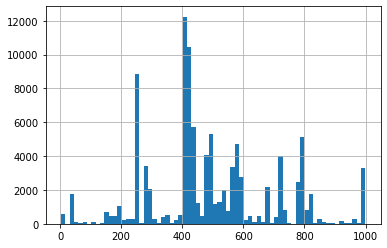

In [ ]:
df.diag_1.hist(bins=70)

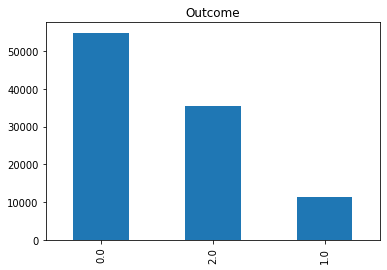

In [ ]:
df['readmitted'].value_counts().plot.bar(title="Outcome")

In [ ]:
df.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.fillna(df.mean(), inplace=True)

Feature importance with random forest classifier

In [ ]:
df = df.astype(int)

In [ ]:
# Create X and Y

X = df.drop(['readmitted'], axis = 1)
y = df['readmitted']
print(X.shape)
print(y.shape)

(101767, 44)
(101767,)


In [ ]:
# 1. Train test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Feature ranking:
1. feature 7 (0.099160)
2. feature 14 (0.088779)
3. feature 13 (0.088708)
4. feature 9 (0.086770)
5. feature 15 (0.086600)
6. feature 6 (0.062557)
7. feature 2 (0.052544)
8. feature 4 (0.043970)
9. feature 12 (0.043790)
10. feature 16 (0.042799)
11. feature 8 (0.039962)
12. feature 3 (0.028949)
13. feature 36 (0.026750)
14. feature 5 (0.022564)
15. feature 0 (0.022091)
16. feature 1 (0.020610)
17. feature 10 (0.019027)
18. feature 11 (0.015103)
19. feature 19 (0.014007)
20. feature 42 (0.013568)
21. feature 18 (0.013303)
22. feature 25 (0.012847)
23. feature 26 (0.011513)
24. feature 28 (0.008648)
25. feature 29 (0.008074)
26. feature 43 (0.007781)
27. feature 23 (0.007355)
28. feature 17 (0.004048)
29. feature 20 (0.003186)
30. feature 21 (0.001791)
31. feature 37 (0.001694)
32. feature 30 (0.000790)
33. feature 22 (0.000319)
34. feature 31 (0.000108)
35. feature 33 (0.000106)
36. feature 27 (0.000052)
37. feature 38 (0.000044)
38. feature 32 (0.000013)
39. feature 24

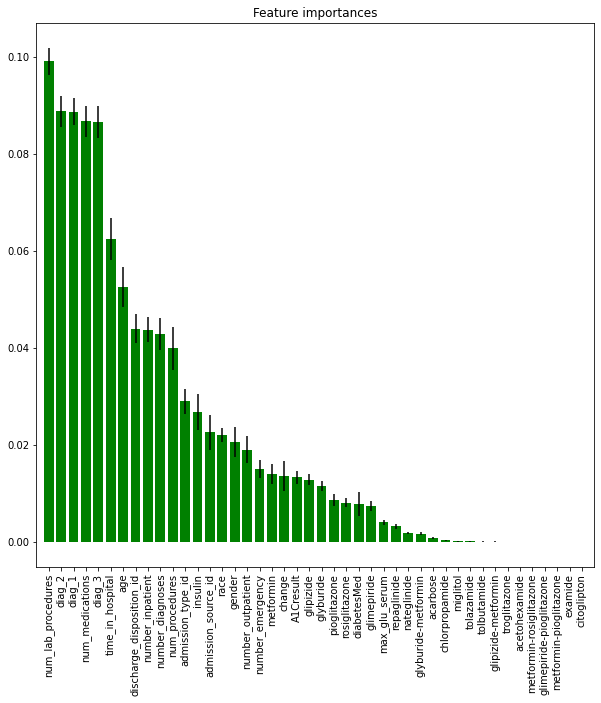

In [ ]:
model = RandomForestClassifier()      
model = model.fit(X_train,y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Random forest classifier

In [ ]:
# Train de model
my_model = RandomForestClassifier(max_depth=3, n_estimators=90) 
my_tree=my_model.fit(X_train, y_train)

# Predict using X_test
y_predicted = my_model.predict(X_test)

# Results
print(accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

0.5545161543903782
[[13391     0   315]
 [ 2550     0   290]
 [ 8179     0   717]]


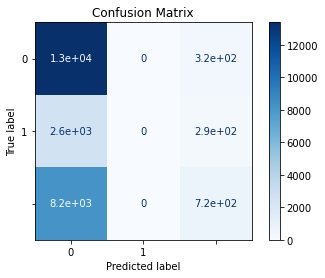

In [ ]:
disp = plot_confusion_matrix(my_model, X_test, y_test,display_labels="01",cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

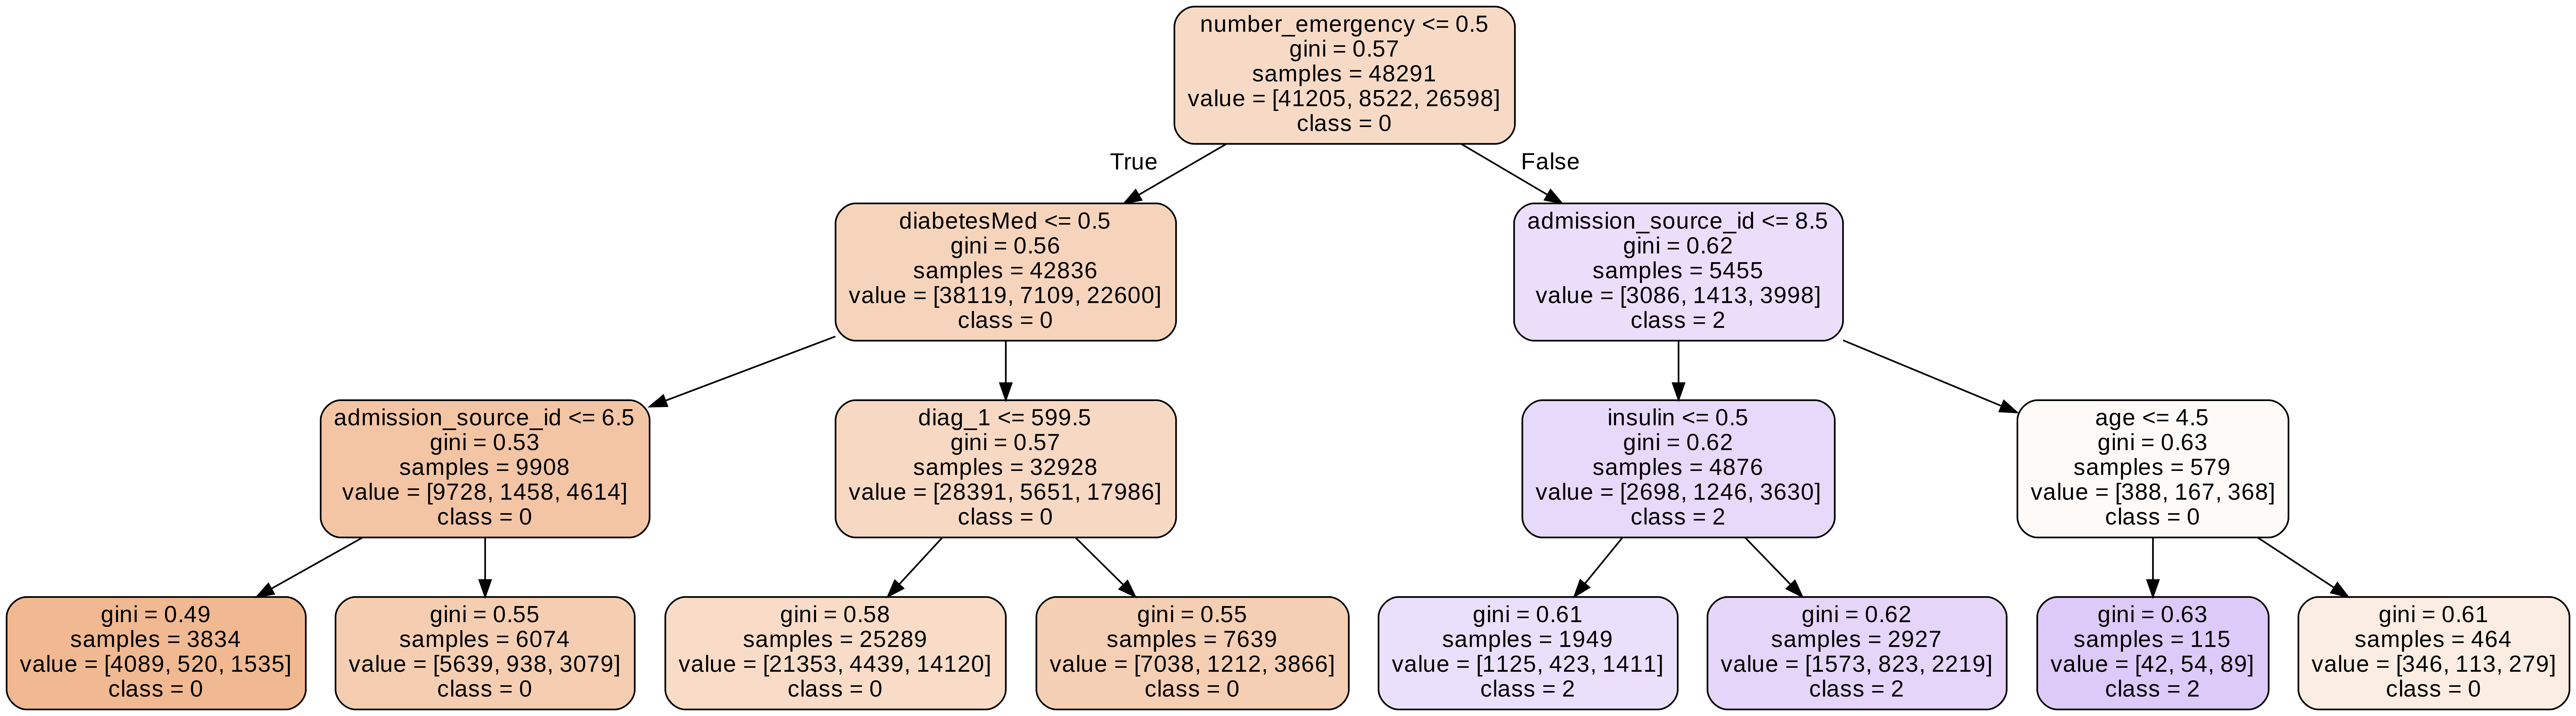

In [ ]:
# Train
my_model.fit(X_train, y_train)
# Extract single tree
estimator = my_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns.values,
                class_names = ["0","1","2"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Taking into account that  for the readmission variable

*    class = **"0"** goes for **NO readmission**
*    class = **"1"** goes for **readmission at < than 30 days**
*    class = **"2"** goes for **readmission at > than 30 days**



In [ ]:
X.groupby(y).agg({'mean'}).round(2)

race gender   age  ... metformin-pioglitazone change diabetesMed
            mean   mean  mean  ...                   mean   mean        mean
readmitted                     ...                                          
0           0.34   0.53  6.05  ...                    0.0   0.44        0.75
1           0.31   0.54  6.18  ...                    0.0   0.49        0.80
2           0.30   0.55  6.14  ...                    0.0   0.49        0.80

[3 rows x 44 columns]

Lets try to predict in that case **time spent on hospital** following the same approach in order to separate in 2 phases to extract information about hospitalization and re-hospitalization and most influential featuresn about it

In [ ]:
X1 = df.drop(['time_in_hospital'], axis = 1)
y1 = df['time_in_hospital']
print(X.shape)
print(y.shape)

(101767, 44)
(101767,)


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

Feature ranking:
1. feature 6 (0.101017)
2. feature 8 (0.094490)
3. feature 12 (0.092487)
4. feature 13 (0.086222)
5. feature 14 (0.083919)
6. feature 2 (0.057292)
7. feature 15 (0.043321)
8. feature 7 (0.042151)
9. feature 4 (0.036588)
10. feature 11 (0.035124)
11. feature 43 (0.031086)
12. feature 3 (0.030678)
13. feature 35 (0.029882)
14. feature 5 (0.027136)
15. feature 0 (0.024806)
16. feature 1 (0.023810)
17. feature 9 (0.022311)
18. feature 18 (0.016751)
19. feature 10 (0.015875)
20. feature 41 (0.014613)
21. feature 17 (0.014442)
22. feature 24 (0.014181)
23. feature 25 (0.012903)
24. feature 42 (0.010979)
25. feature 27 (0.009675)
26. feature 28 (0.008700)
27. feature 22 (0.007929)
28. feature 16 (0.003908)
29. feature 19 (0.003094)
30. feature 20 (0.001687)
31. feature 36 (0.001635)
32. feature 29 (0.000734)
33. feature 21 (0.000242)
34. feature 32 (0.000106)
35. feature 30 (0.000094)
36. feature 26 (0.000063)
37. feature 37 (0.000039)
38. feature 31 (0.000011)
39. feature 39

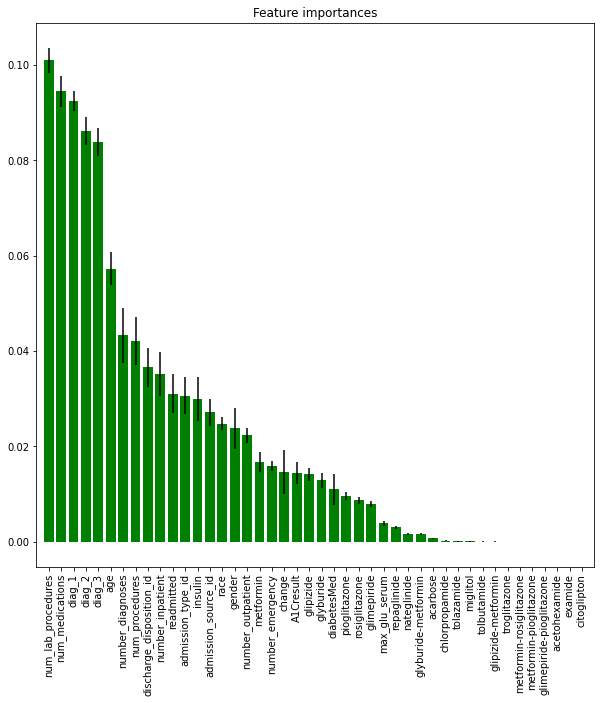

In [ ]:
model = RandomForestClassifier()      
model = model.fit(X1_train,y1_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(X1_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X1_train.shape[1]), X1_train.columns[indices],rotation=90)
plt.xlim([-1, X1_train.shape[1]])
plt.show()

In [ ]:
X1.groupby(y1).agg({'mean'}).round(2)

race gender   age  ... change diabetesMed readmitted
                  mean   mean  mean  ...   mean        mean       mean
time_in_hospital                     ...                              
1                 0.34   0.49  5.81  ...   0.35        0.69       0.71
2                 0.34   0.53  5.84  ...   0.42        0.75       0.79
3                 0.31   0.54  6.06  ...   0.46        0.78       0.79
4                 0.31   0.55  6.18  ...   0.48        0.78       0.85
5                 0.31   0.55  6.25  ...   0.49        0.79       0.84
6                 0.30   0.57  6.32  ...   0.49        0.79       0.86
7                 0.31   0.55  6.31  ...   0.52        0.79       0.85
8                 0.34   0.55  6.32  ...   0.54        0.80       0.87
9                 0.32   0.55  6.36  ...   0.54        0.81       0.87
10                0.33   0.55  6.27  ...   0.55        0.79       0.86
11                0.32   0.56  6.35  ...   0.55        0.80       0.86
12                0.33   0.55  6.32  ...   0.55        0.82       0.85
13                0.31   0.54  6.32  ...   0.57        0.83       0.82
14                0.32   0.55  6.36  ...   0.58        0.82       0.86

[14 rows x 44 columns]

Since there are 14 days difference it would be interesting to reduce from 14 groups to just 3 of them, in order to increase interpretability:

New 3 groups will be

*   0 for hospitalization time of less than 5 days
*   1 for hospitalization time of less than 10 days
*   2 for hospitalization time of less than 15 days



In [ ]:
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 0	, value = 0)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 1	, value = 0)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 2	, value = 0)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 3	, value = 0)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 4	, value = 0)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 5	, value = 1)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 6	, value = 1)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 7	, value = 1)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 8	, value = 1)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 9	, value = 1)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 10	, value = 2)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 11	, value = 2)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 12	, value = 2)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 13	, value = 2)
df["time_in_hospital"]=df["time_in_hospital"].replace(to_replace = 14	, value = 2)

#X1.groupby(df["time_in_hospital"]).agg({'mean'}).round(2)


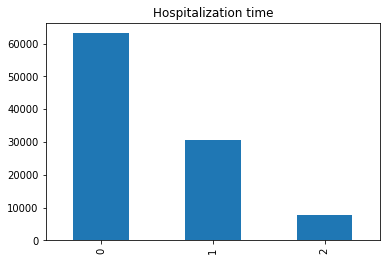

In [ ]:
df['time_in_hospital'].value_counts().plot.bar(title="Hospitalization time")

In [ ]:
X1 = df.drop(['time_in_hospital'], axis = 1)
y1 = df['time_in_hospital']
print(X.shape)
print(y.shape)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

# Train de model
my_model = RandomForestClassifier(max_depth=3, n_estimators=90, class_weight={0:0.6,1:0.3,2:0.1}) 
my_tree=my_model.fit(X1_train, y1_train)

# Predict using X_test
y1_predicted = my_model.predict(X1_test)

# Results
print(accuracy_score(y1_test, y1_predicted))
print(confusion_matrix(y1_test, y1_predicted))

(101767, 44)
(101767,)
0.6239682414904488
[[15875     0     0]
 [ 7667     0     0]
 [ 1900     0     0]]


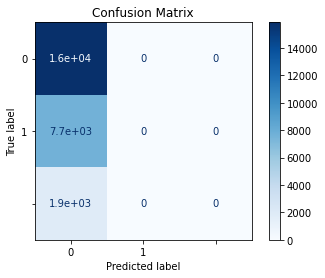

In [ ]:
disp = plot_confusion_matrix(my_model, X1_test, y1_test,display_labels="01",cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

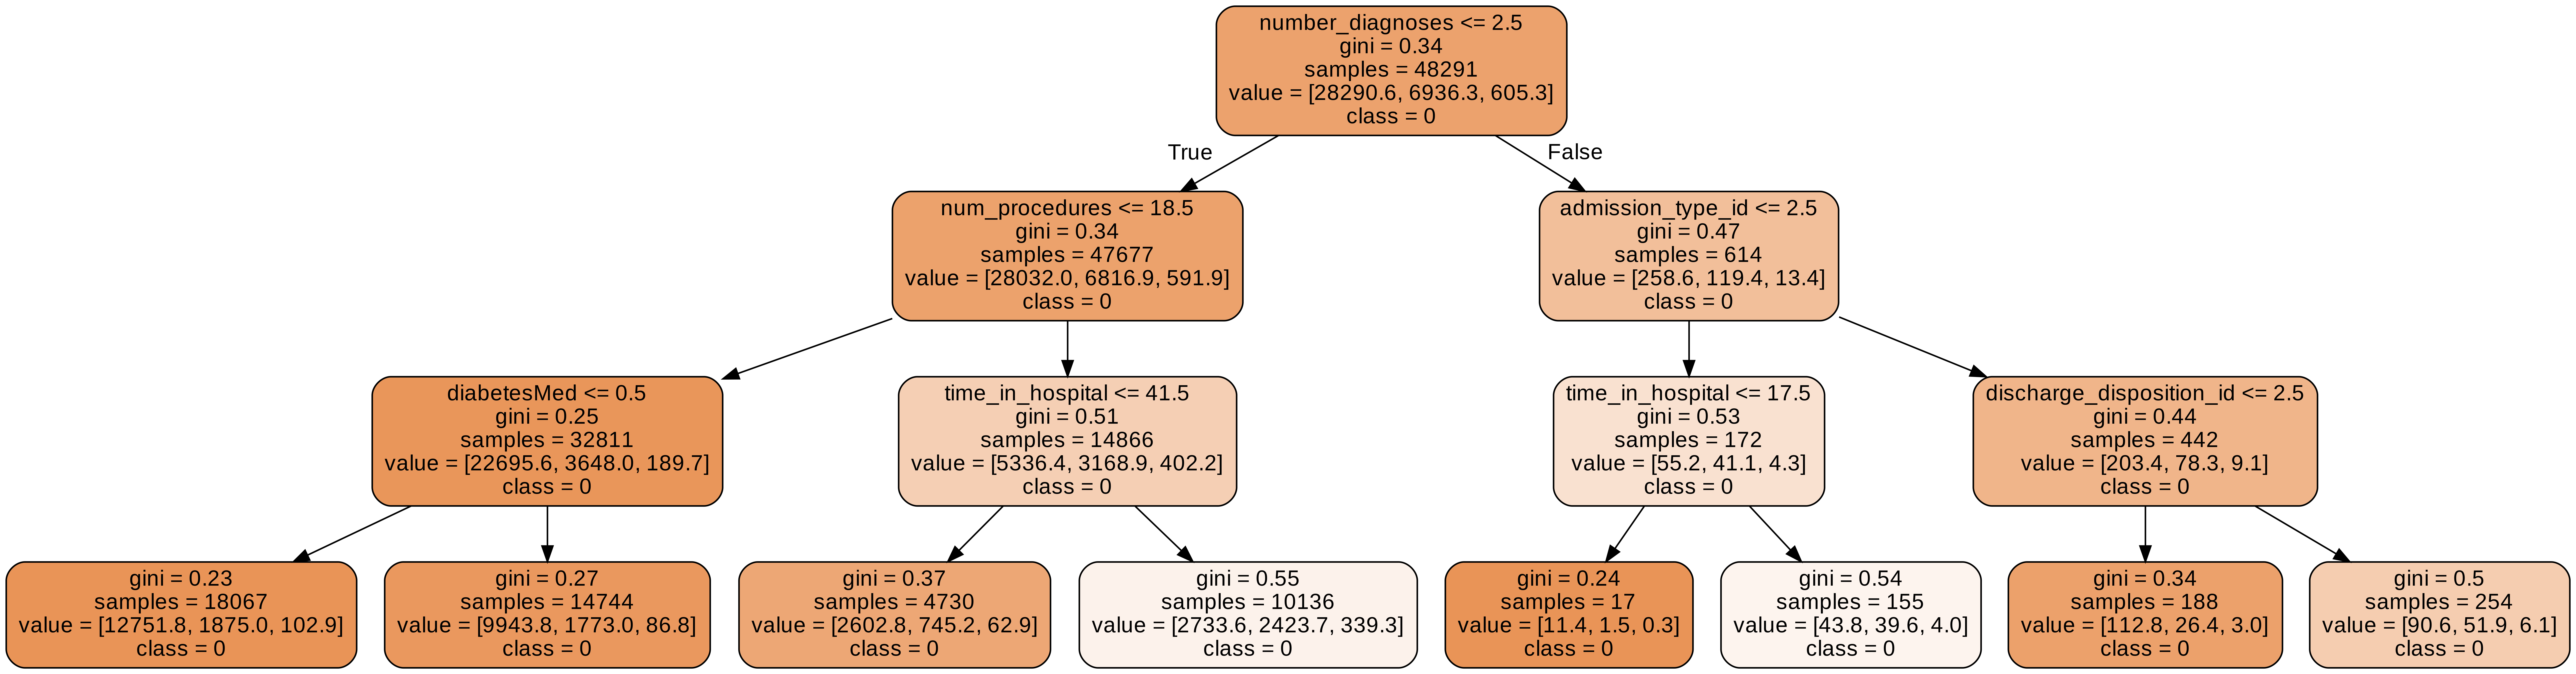

In [ ]:
# Train
my_model.fit(X1_train, y1_train)
# Extract single tree
estimator = my_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns.values,
                class_names = ["0","1","2"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

(101767, 8)
(101767,)


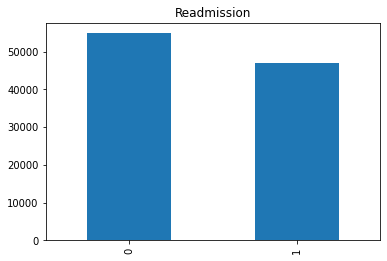

In [ ]:
df['readmitted']=df['readmitted'].replace(to_replace=2	, value = 1)

X2 = df[['time_in_hospital','diag_1','diag_2','diag_3','num_procedures','admission_type_id','num_medications','number_inpatient']]
y2 = df['readmitted']

print(X2.shape)
print(y2.shape)
df['readmitted'].value_counts().plot.bar(title="Readmission")

In [ ]:

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

# Train de model
my_model_curated = RandomForestClassifier(max_depth=3, n_estimators=90) 
my_tree=my_model_curated.fit(X2_train, y2_train)

# Predict using X_test
y2_predicted = my_model_curated.predict(X2_test)

# Results
print(accuracy_score(y2_test, y2_predicted))
print(confusion_matrix(y2_test, y2_predicted))

0.6136310038518984
[[10517  3189]
 [ 6641  5095]]


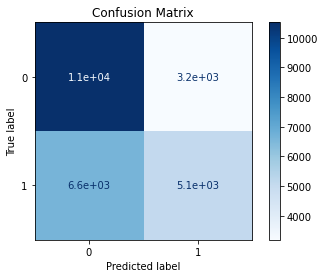

In [ ]:
disp = plot_confusion_matrix(my_model_curated, X2_test, y2_test,display_labels="01",cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

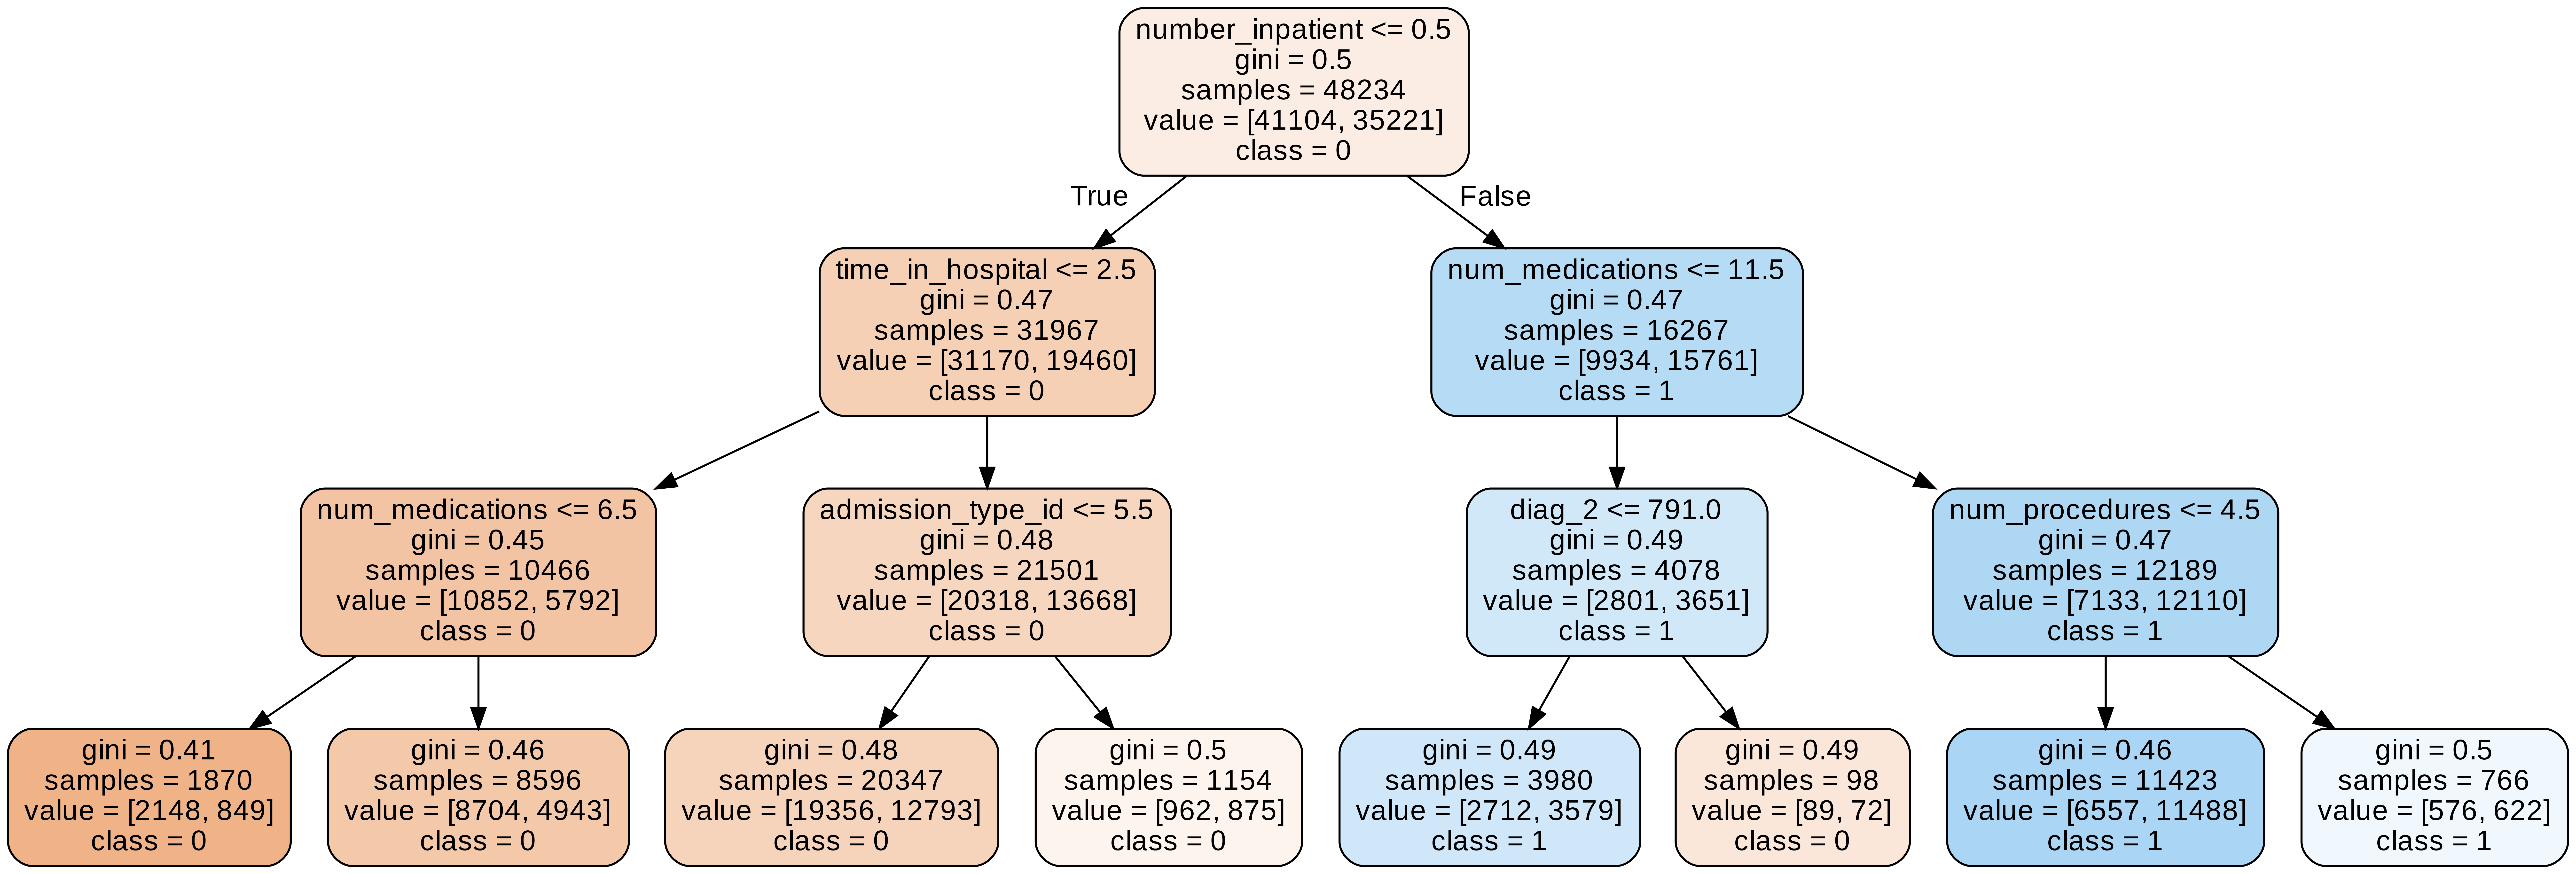

In [ ]:
# Train
my_model_curated.fit(X2_train, y2_train)
# Extract single tree
estimator = my_model_curated.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X2_train.columns.values,
                class_names = ["0","1"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

(101767, 8)
(101767,)


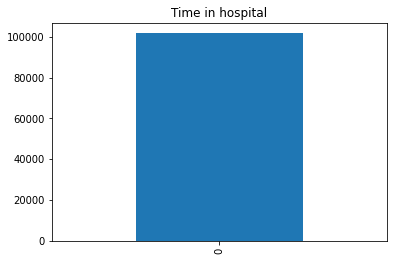

In [ ]:
X3 = df[['diag_1','diag_2','diag_3','num_lab_procedures','admission_type_id','num_medications','age','number_diagnoses']]
y3 = df['time_in_hospital']

print(X3.shape)
print(y3.shape)
df['time_in_hospital'].value_counts().plot.bar(title="Time in hospital")